In [1]:
## Finesse model of something close to v1 schema

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from pykat import finesse
from pykat.commands import *

                                              ..-
    PyKat 1.1.372         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [21]:
# two commands to initialise Finesse and Pykat
kat = finesse.kat()
kat.verbose = False

# the code describing the optical model and the basic task
code = """
# setup of the interferometer, each line is one component
l laser1 1.0 0 n1 # laser with P = 1W at the default frequency
s s1 0.0762 n1 n2      # space connecting the laser to something
mod mod25 25M .4 1 pm n2 n3 #Adding EOM
s s2 0.0762 n3 n4
bs bs1 0.5 0.5 0 0 n4 n5 n6 n7 # 50:50 beam splitter
s s3 0 n6 n8      # space connecting the laser to something
m minp .99375 .001 0 n8 n9
s s4 0.1 n9 n10
m mend .99375 .001 0 n10 n11

pd pow_t n11 # photodiode detecting the cavity transmitted light
#pd1 pow_t 25M 0 n11 
pd1 pow_r 25M 0 n7
#pd pow_r n7

# setup of the simulation task, each line is one command
xaxis mend phi lin -10 10 1000 # change the laser detuning
#xaxis laser1 P lin 0 1 10 # change the laser power from 0 to 1W in 10 steps
yaxis abs                 # plot the magnutide of the detector output
"""

# parsing the code and creating the model
kat.parse(code)

# running the simulation
out1 = kat.run()

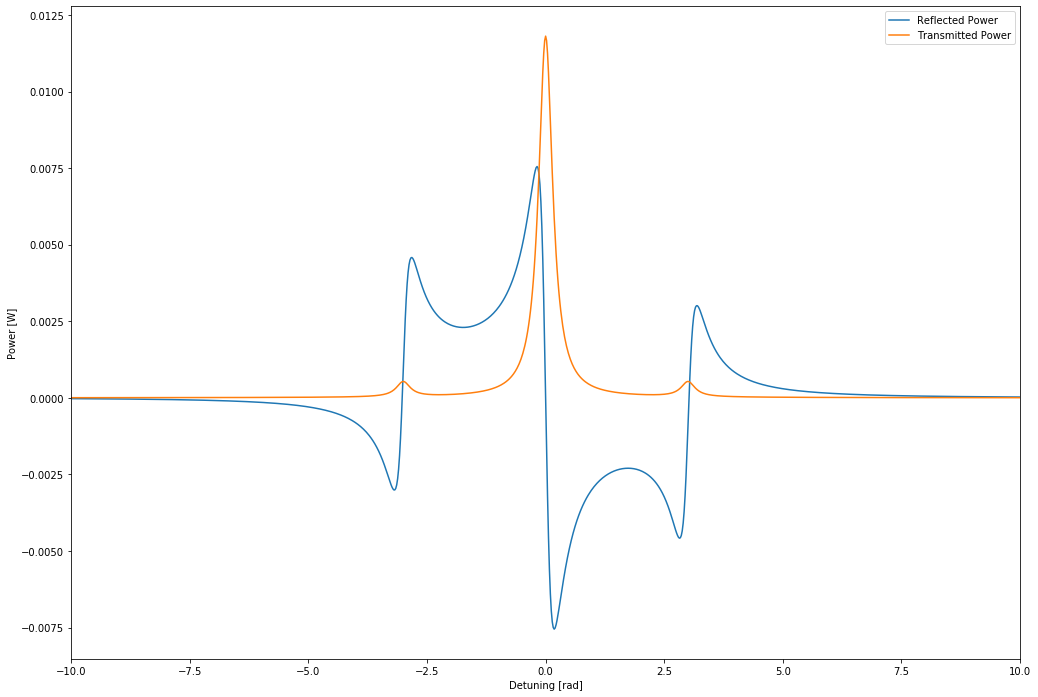

In [22]:
fig = plt.figure(figsize=(17,12))
plt.plot(out1.x, out1["pow_r"], label="Reflected Power")
plt.plot(out1.x, out1["pow_t"], label="Transmitted Power")
plt.xlim(out1.x.min(), out1.x.max())
plt.ylabel("Power [W]")
plt.xlabel("Detuning [rad]")
plt.legend();